# Differential equations. Assignment. Numerical methods
Madina Gafarova, BS17-02

$f(x)= x^3y^4 - y/x$
$$
x0 = 1\\
y0 = 0.5\\
X = \mbox{point of discontinuity - h}
$$

$$
\left\{\begin{matrix}
  y'=f(x, y)\\ 
  y(x_{0})=y_{0}\\
  x\in [x_{0}, X]
\end{matrix}\right.
$$

The point of discontinuity (for $y0 = 0.5$ and $ x0 = 1$) : $\frac{11}{3} $


**Import libraries :** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import plotly.plotly as ply
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, Image, display, Math, Latex

Initial function and initial points

In [2]:
# f = lambda x, y: x**3 * y**4 - y/x

def f(x, y):
    if isinstance(y, complex) or y > 100000000000:
        return np.NAN
    return x**3 * y**4 - y/x
x0 = 1
y0 = 0.5
h = 0.01
X = 5
C = (y0*x0)**(-3) + 3*x0

##Exact function(solution)
# f_exact =  lambda x: (C-3*x)**(-1/3)/x

def f_exact(x):
    result = 1
    root_inner = C - 3*x
    if root_inner < 0:
        root_inner *= -1
        result *= -1
    return result*root_inner**(-1/3)/x


disc_point = C/3
print(disc_point)
X0 = disc_point - h*20
x1 = disc_point + h*20


3.6666666666666665


# Euler method

In [3]:
def euler_method(f, x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    
    array = [(x, y)]
    for i in range(num_steps):
        y = y + h*f(x, y)
        x = x + h
        array.append((x, y))
    return np.array(array)

In [4]:
array = euler_method(f, x0, y0, X0, h)
array_disc = euler_method(f, x1, f_exact(x1), X, h)

### The plot of Euler method

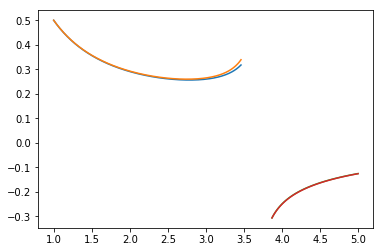

In [5]:
plt.plot(array[:,0], array[:,1])
plt.plot(array[:,0], [f_exact(x) for x in array[:,0]])


plt.plot(array_disc[:,0], array_disc[:,1])
plt.plot(array_disc[:,0], [f_exact(x) for x in array_disc[:,0]])

### The error of Euler method

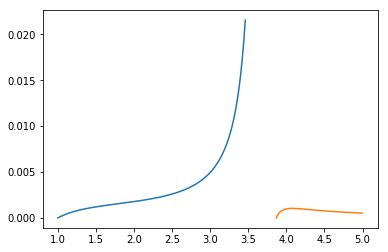

In [6]:
error = np.abs([f_exact(x) for x in array[:,0]]-array[:,1])
error_disc = np.abs([f_exact(x) for x in array_disc[:,0]]-array_disc[:,1])

plt.plot(array[:,0], error)
plt.plot(array_disc[:,0], error_disc)


**Printing Euler error**

In [7]:
print(f'{error[:7]}\n{error_disc[:7]}')

[0.00000000e+00 4.48683877e-05 8.82158867e-05 1.30110658e-04
 1.70617374e-04 2.09797427e-04 2.47709126e-04]
[0.         0.00017879 0.00032713 0.00045066 0.00055383 0.00064019
 0.00071256]


# Improved Euler method

In [8]:
def improved_euler_method(f , x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    array_im = [(x, y)]
    
    for i in range (num_steps):
        tmp = y
        y = y + h*f(x,y)
        y = tmp + h/2*(f(x, tmp) + f(x+h, y))
        x = x + h
        array_im.append((x, y))
    return np.array(array_im)

In [9]:
array_im = improved_euler_method(f, x0, y0, X0, h)
array_im_disc = improved_euler_method(f, x1, f_exact(x1), X, h)

## The plot of Improved Euler method

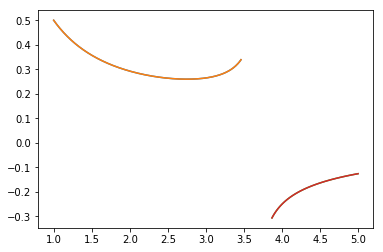

In [10]:
plt.plot(array_im[:,0], array_im[:,1])
plt.plot(array_im[:,0], [f_exact(x) for x in array_im[:,0]])


plt.plot(array_im_disc[:,0], array_im_disc[:,1])
plt.plot(array_im_disc[:,0], [f_exact(x) for x in array_im_disc[:,0]])

## The error of Improved Euler method

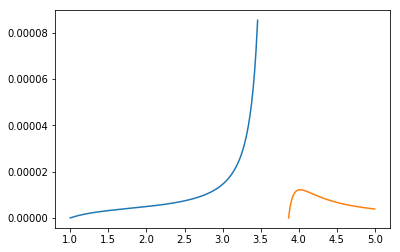

In [11]:
error_im = np.abs([f_exact(x) for x in array_im[:,0]]-array_im[:,1])
error_im_disc = np.abs([f_exact(x) for x in array_im_disc[:,0]]-array_im_disc[:,1])

plt.plot(array_im[:,0], error_im)
plt.plot(array_im_disc[:,0], error_im_disc)

**Printing Improved Euler error**

In [12]:
print(f'{error_im[:7]}\n{error_im_disc[:7]}')

[0.00000000e+00 1.10307652e-07 2.17225256e-07 3.20899832e-07
 4.21471093e-07 5.19071874e-07 6.13828533e-07]
[0.00000000e+00 2.62557793e-06 4.71869897e-06 6.39039984e-06
 7.72597094e-06 8.79158961e-06 9.63907570e-06]


# Runge-Kutta method

In [13]:
def runge_kutta_method(f, x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    array_rk = [(x, y)]
    
    for i in range(num_steps):
        k1 = h*f(x, y)
        k2 = h*f(x + h/2, y + k1/2)
        k3 = h*f(x + h/2, y + k2/2)
        k4 = h*f(x + h, y + k3)
        y = y + (1/6)*(k1 + 2*k2 + 2*k3+ k4)
        x = x + h
        array_rk.append((x, y))
    return np.array(array_rk)

In [14]:
array_rk = runge_kutta_method(f, x0, y0, X0, h)
array_rk_disc = runge_kutta_method(f, x1, f_exact(x1), X, h)

## The plot of Runge-Kutta method

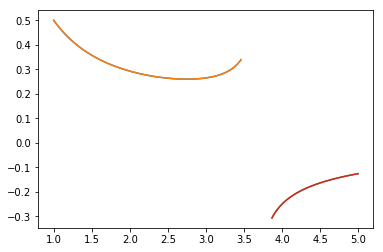

In [15]:
plt.plot(array_rk[:,0], array_rk[:,1])
plt.plot(array_rk[:,0], [f_exact(x) for x in array_rk[:,0]])


plt.plot(array_rk_disc[:,0], array_rk_disc[:,1])
plt.plot(array_rk_disc[:,0], [f_exact(x) for x in array_rk_disc[:,0]])

## The error of Runge-Kutta method

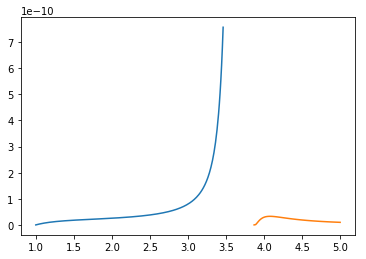

In [16]:
error_rk = np.abs([f_exact(x) for x in array_rk[:,0]]-array_rk[:,1])
error_rk_disc = np.abs([f_exact(x) for x in array_rk_disc[:,0]]-array_rk_disc[:,1])

plt.plot(array_rk[:,0], error_rk)
plt.plot(array_rk_disc[:,0], error_rk_disc)

**Printing Runge-Kutta error**

In [17]:
print(f'{error_rk[:7]}\n{error_rk_disc[:7]}')

[0.00000000e+00 7.81763543e-13 1.52916568e-12 2.24392727e-12
 2.92804669e-12 3.58307828e-12 4.21074287e-12]
[0.00000000e+00 5.74706949e-13 1.22107879e-12 4.19159152e-12
 7.63539232e-12 1.11478604e-11 1.45038426e-11]


## Comparisons of numerical methods

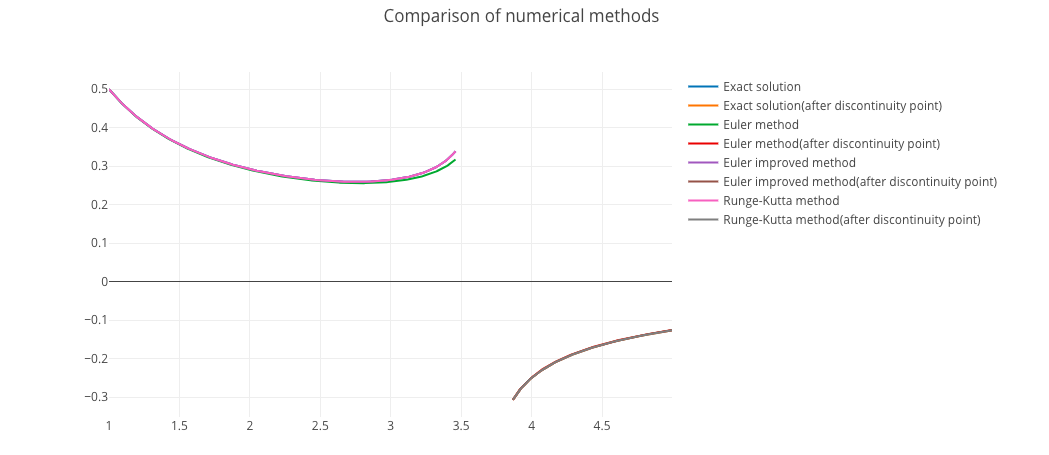

In [21]:
trace1 = go.Scatter(
    name = "Exact solution",
    x = array[:,0],
    y = [f_exact(x) for x in array[:,0]],
)
trace1_part2 = go.Scatter(
    name = "Exact solution(after discontinuity point)",
    x = array_disc[:,0],
    y = [f_exact(x) for x in array_disc[:,0]],
)
trace2 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = array[:,1] 
)

trace2_part2 = go.Scatter(
    name = "Euler method(after discontinuity point)",
    x = array_disc[:,0],
    y = array_disc[:,1] 
)

trace3 = go.Scatter(
    name = "Euler improved method",
    x = array_im[:,0],
    y = array_im[:,1],
)
trace3_part2 = go.Scatter(
    name = "Euler improved method(after discontinuity point)",
    x = array_im_disc[:,0],
    y = array_im_disc[:,1],
)
trace4 = go.Scatter(
    name = "Runge-Kutta method",
    x = array_rk[:,0],
    y = array_rk[:,1],
)
trace4_part2 = go.Scatter(
    name = "Runge-Kutta method(after discontinuity point)",
    x = array_rk_disc[:,0],
    y = array_rk_disc[:,1],
)
layout_ltr = go.Layout(title="Comparison of numerical methods")
data = [trace1, trace1_part2, trace2, trace2_part2, trace3,trace3_part2, trace4, trace4_part2]
fig = go.Figure(data= data, layout=layout_ltr)
#ply.iplot(fig)
display(Image("images/comparison of num methods.png"))

## Comparisons of numerical errors

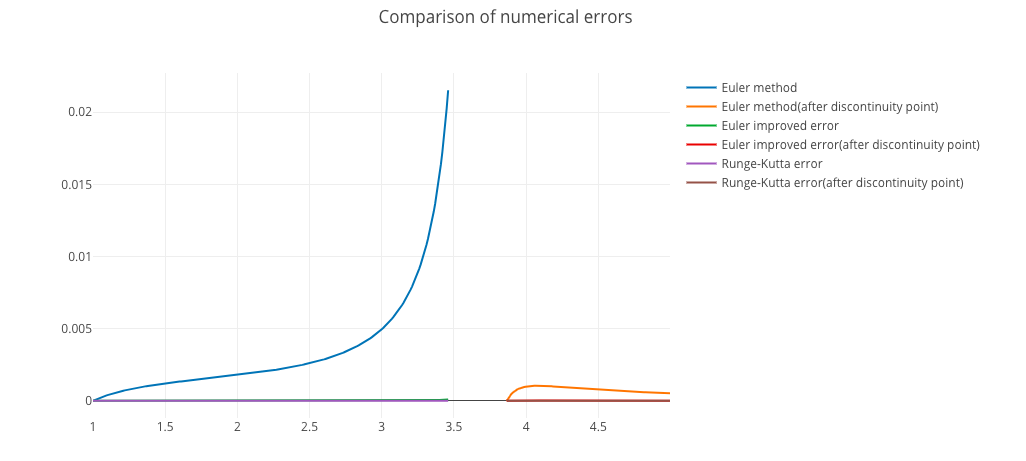

In [22]:
trace_error1 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = error
)
trace_error1_part2 = go.Scatter(
    name = "Euler method(after discontinuity point)",
    x = array_disc[:,0],
    y = error_disc
)
trace_error2 = go.Scatter(
    name = "Euler improved error",
    x = array_im[:,0],
    y = error_im
)
trace_error2_part2 = go.Scatter(
    name = "Euler improved error(after discontinuity point)",
    x = array_im_disc[:,0],
    y = error_im_disc
)
trace_error3 = go.Scatter(
    name = "Runge-Kutta error",
    x = array_rk[:,0],
    y = error_rk
)
trace_error3_part2 = go.Scatter(
    name = "Runge-Kutta error(after discontinuity point)",
    x = array_rk_disc[:,0],
    y = error_rk_disc
)
layout_ltr = go.Layout(title="Comparison of numerical errors")
data = [trace_error1, trace_error1_part2, trace_error2,trace_error2_part2, trace_error3, trace_error3_part2]
fig = go.Figure(data= data, layout=layout_ltr)
#ply.iplot(fig)
display(Image("images/comparison of num errors.png"))

## Log10 errors

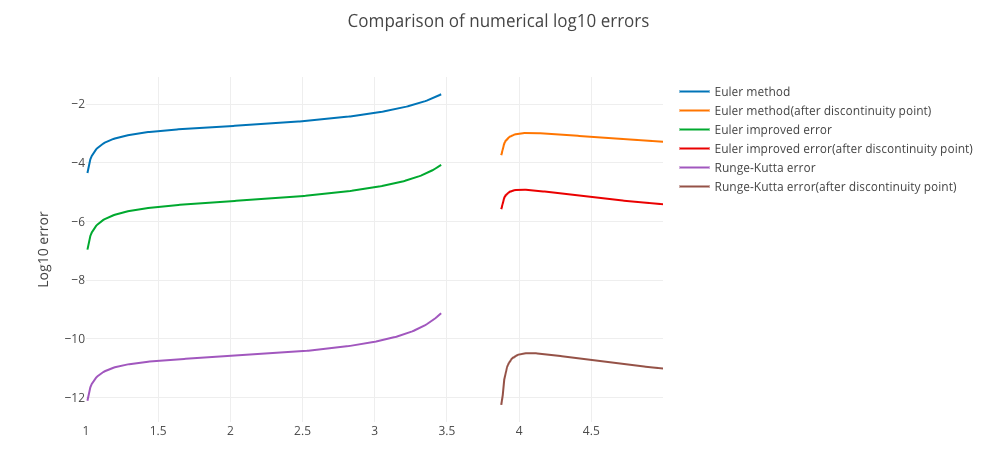

In [23]:
trace_log_error1 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = np.log10(error)
)
trace_log_error1_part2 = go.Scatter(
    name = "Euler method(after discontinuity point)",
    x = array_disc[:,0],
    y = np.log10(error_disc)
)
trace_log_error2 = go.Scatter(
    name = "Euler improved error",
    x = array_im[:,0],
    y = np.log10(error_im)
)
trace_log_error2_part2 = go.Scatter(
    name = "Euler improved error(after discontinuity point)",
    x = array_im_disc[:,0],
    y = np.log10(error_im_disc)
)
trace_log_error3 = go.Scatter(
    name = "Runge-Kutta error",
    x = array_rk[:,0],
    y = np.log10(error_rk)
)
trace_log_error3_part2 = go.Scatter(
    name = "Runge-Kutta error(after discontinuity point)",
    x = array_rk_disc[:,0],
    y = np.log10(error_rk_disc)
)
layout_ltr = go.Layout(title="Comparison of numerical log10 errors", yaxis=dict(title="Log10 error"))
data = [trace_log_error1, trace_log_error1_part2, trace_log_error2,trace_log_error2_part2, trace_log_error3, trace_log_error3_part2]
fig = go.Figure(data= data, layout=layout_ltr)
# ply.iplot(fig)
display(Image("images/comparison of log errors.png"))